<a href="https://colab.research.google.com/github/lauren-kirsh/Data-Science-Portfolio/blob/main/Final_DS_UA_202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The William and Flora Hewlett Foundation (Hewlett) sponsored the Automated Student Assessment Prize (ASAP).  Hewlett is appealed to data scientists and machine learning specialists to help create a fast, effective and affordable solutions for automated grading of student-written essays.

Here is a description of the competition: https://www.kaggle.com/c/asap-aes/overview

We explored the_Havelett_Foundation_Automated_Scoring ADS that is copied below. All the sections up until the "Outcomes" section are a part of the ADS. 

Here is a link to the ADS on Kaggle: https://www.kaggle.com/irfanmansuri/the-havelett-foundation-automated-scoring 

## Load Data

In [ ]:
# import packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS

import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
from string import punctuation
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk import pos_tag
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import wordnet, stopwords
from nltk.stem import WordNetLemmatizer


from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,plot_confusion_matrix
from sklearn.model_selection import train_test_split
import collections

import nltk 
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.getcwd()

'/content'

We decided to hard code paths to the data stored in our google drives. We each used our own paths to access the data. 

Therefore, we recommend creating your own path to the data using the data we submitted in our final project zip folder. Remember to use the training_set_rel3.tsv, test_set_rel3.tsv, and valid_set_rel3.tsv datasets.

In [ ]:
# load the data
df_train = pd.read_csv('gdrive/MyDrive/Junior_Year/Spring_2021/Responsible_Data/Project/asap_aes/training_set_rel3.tsv', sep='\t', encoding='ISO-8859-1')
df_test = pd.read_csv('gdrive/MyDrive/Junior_Year/Spring_2021/Responsible_Data/Project/asap_aes/test_set.tsv', sep='\t', encoding='ISO-8859-1')
df_val = pd.read_csv('gdrive/MyDrive/Junior_Year/Spring_2021/Responsible_Data/Project/asap_aes/valid_set.tsv', sep='\t', encoding='ISO-8859-1')

Burlyn Paths

df_train = pd.read_csv('gdrive/MyDrive/Spring 2021/Responsible Data Science (DS-UA 202)/Project/asap_aes/training_set_rel3.tsv', sep='\t', encoding='ISO-8859-1')
df_test = pd.read_csv('gdrive/MyDrive/Spring 2021/Responsible Data Science (DS-UA 202)/Project/asap_aes/test_set.tsv', sep='\t', encoding='ISO-8859-1')
df_val = pd.read_csv('gdrive/MyDrive/Spring 2021/Responsible Data Science (DS-UA 202)/Project/asap_aes/valid_set.tsv', sep='\

Lauren Paths

df_train = pd.read_csv('gdrive/MyDrive/Junior_Year/Spring_2021/Responsible_Data/Project/asap_aes/training_set_rel3.tsv', sep='\t', encoding='ISO-8859-1')
df_test = pd.read_csv('gdrive/MyDrive/Junior_Year/Spring_2021/Responsible_Data/Project/asap_aes/test_set.tsv', sep='\t', encoding='ISO-8859-1')
df_val = pd.read_csv('gdrive/MyDrive/Junior_Year/Spring_2021/Responsible_Data/Project/asap_aes/valid_set.tsv', sep='\t', encoding='ISO-8859-1')

##Inspecting Data


In [ ]:
df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,rater1_trait2,rater1_trait3,rater1_trait4,rater1_trait5,rater1_trait6,rater2_trait1,rater2_trait2,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_test.head()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,2383,1,I believe that computers have a positive effec...,2383,NaN
1,2384,1,"Dear @CAPS1, I know some problems have came up...",2384,NaN
2,2385,1,"Dear to whom it @MONTH1 concern, Computers are...",2385,NaN
3,2386,1,"Dear @CAPS1 @CAPS2, @CAPS3 has come to my atte...",2386,NaN
4,2387,1,"Dear Local newspaper, I think that people have...",2387,NaN


In [ ]:
# Getting more info about the test info

df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4254 entries, 0 to 4253
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   essay_id              4254 non-null   int64  
 1   essay_set             4254 non-null   int64  
 2   essay                 4254 non-null   object 
 3   domain1_predictionid  4254 non-null   int64  
 4   domain2_predictionid  600 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 166.3+ KB


In [ ]:
df_train.shape

(12976, 28)

In [ ]:
# Getting more info about the train dataset
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12976 non-null  int64  
 1   essay_set       12976 non-null  int64  
 2   essay           12976 non-null  object 
 3   rater1_domain1  12976 non-null  int64  
 4   rater2_domain1  12976 non-null  int64  
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12976 non-null  int64  
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

In [ ]:
# Let's check how many values are none in each row of the train dataset
df_train.isnull().sum()

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

In [ ]:
# Since a large part of the dataset has columns with more than 70-80 percent missing values so Deleting those columns
df_train.dropna(axis = 1, inplace = True)
df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",4,4,8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,9
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,7
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,10
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,8


In [ ]:
# Describing the train set
df_train.describe()

,essay_id,essay_set,rater1_domain1,rater2_domain1,domain1_score
count,12976.000000,12976.000000,12976.000000,12976.000000,12976.000000
mean,10295.395808,4.179485,4.127158,4.137408,6.800247
std,6309.074105,2.136913,4.212544,4.264330,8.970705
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,4438.750000,2.000000,2.000000,2.000000,2.000000
50%,10044.500000,4.000000,3.000000,3.000000,3.000000
75%,15681.250000,6.000000,4.000000,4.000000,8.000000
max,21633.000000,8.000000,30.000000,30.000000,60.000000


In [ ]:
# Checking how many unique essay id were given
print(df_train['essay_set'].nunique())
df_train['essay_set'].unique()

8


array([1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
# Counting the number of eacy essay_set

print(df_train.groupby('essay_set').size())


essay_set
1    1783
2    1800
3    1726
4    1770
5    1805
6    1800
7    1569
8     723
dtype: int64


So there is 8 unique set of essay in the given training set

In [ ]:
# Lets see the unique ratings which are being given by the rater1

print(df_train['rater1_domain1'].nunique())
df_train['rater1_domain1'].unique()

30


array([ 4,  5,  3,  6,  2,  1,  0,  8,  7, 11,  9, 10, 12, 18, 21, 15, 20,
       16, 23, 22, 17, 19, 25, 13, 30, 24, 14, 27, 26, 28])

In [ ]:
# Counting the number of rates of each rates given by rater1

print(df_train.groupby('rater1_domain1').size())

rater1_domain1
0      462
1     2062
2     2556
3     2789
4     2254
5      704
6      266
7      127
8      420
9      206
10     148
11     102
12     182
13      13
14       9
15     113
16      46
17      74
18      73
19      30
20     245
21      22
22      14
23      19
24       6
25      27
26       1
27       2
28       1
30       3
dtype: int64


There is 30 rating points ranging from 0 to 30 excluding the 29 which have been given by rater1 to differen essay sests

In [ ]:
# Lets see the unique ratings which are being given by the rater2

print(df_train['rater2_domain1'].nunique())
df_train['rater2_domain1'].unique()

29


array([ 4,  3,  5,  6,  2,  1,  0,  7,  8,  9, 12, 10, 11, 16, 26, 20, 15,
       18, 19, 25, 17, 24, 22, 30, 21, 14, 23, 13, 27])

In [ ]:
# Counting the number of rates of each rates given by rater1

print(df_train.groupby('rater1_domain1').size())

rater1_domain1
0      462
1     2062
2     2556
3     2789
4     2254
5      704
6      266
7      127
8      420
9      206
10     148
11     102
12     182
13      13
14       9
15     113
16      46
17      74
18      73
19      30
20     245
21      22
22      14
23      19
24       6
25      27
26       1
27       2
28       1
30       3
dtype: int64


There is 29 rating points ranging from 0 to 30 excluding the 28 and 29 which have been given by rater2 to differen essay sests

In [ ]:
# Maximum domain score obtained by any essay

df_train['domain1_score'].max()

60

The maximum score that an essay scored is 60

In [ ]:
# Minimum domain score obtained by any essay

df_train['domain1_score'].min()

0

The minimum score that was scored by any essay is 0

## Visualization

In [ ]:
# Visualizing the percentage wise share of the various sets of essay 

labels = df_train['essay_set'].value_counts().index
values = df_train['essay_set'].value_counts().values

colors = df_train['essay_set']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo = "label+percent",
                              marker = dict(colors = colors, line=dict(color='#000000', width=2)), 
                              title = "Distribution of sets of essay")])

fig.show()

From the above Pie-Chart we can see that set 8 was the least distributed set 

In [ ]:
# Visualizing the percentage wise share of top 10 grades given by rater 1 and their percentage

labels = df_train['rater1_domain1'].value_counts()[:10].index
values = df_train['rater1_domain1'].value_counts()[:10].values

colors = df_train['rater1_domain1']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo = "label+percent",
                              marker = dict(colors = colors), 
                              title = "Top 10 grades given by rater 1 and their percentage")])

fig.show()

From the above plot we can see that a large section of the essay rated by rater1 received just rating as 3,2,4 and 1

In [ ]:
# Visualizing the percentage wise share of top 10 grades given by rater 1 and their percentage

labels = df_train['rater2_domain1'].value_counts()[:10].index
values = df_train['rater2_domain1'].value_counts()[:10].values

colors = df_train['rater2_domain1']

fig = go.Figure(data = [go.Pie(labels = labels, values = values, textinfo = "label+percent",
                              marker = dict(colors = colors), 
                              title = "Top 10 grades given by rater2 and their percentage")])

fig.show()

From the above plot we can see that a large section of the essay rated by rater2 received just rating as 3,2,4 and 1

## Data Preprocessing

Data preprocessing is one of the critical steps in any machine learning project. It includes cleaning and formatting the data before feeding into a machine learning algorithm. For NLP, the preprocessing steps are comprised of the following tasks:

* Tokenizing the string
* Lowercasing
* Removing stop words and punctuation
* Stemming
* Lemmatization

### Cleaning the Text
Removes all special characters. 

In [ ]:
# Defining function to clean the text
def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
# Applying clean text function on short_description to clean the text of train set

df_train['essay'] = df_train['essay'].apply(lambda x: clean_text(x))

In [ ]:
# Now checking whether the text of the essay columns have been changed or not

df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,dear local newspaper i think effects computers...,4,4,8
1,2,1,dear i believe that using computers will ben...,5,4,9
2,3,1,dear more and more people use computers but...,4,3,7
3,4,1,dear local newspaper i have found that many e...,5,5,10
4,5,1,dear i know having computers has a positive e...,4,4,8


### Plotting the WordCloud

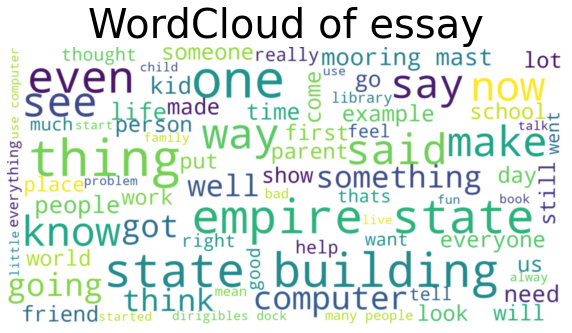

In [ ]:
word_cloud = WordCloud(
                       width=1600,
                       height=800, 
                       margin=0,
                       max_words=500, # Maximum numbers of words we want to see 
                       max_font_size=150, min_font_size=30,  # Font size range
                       background_color="white"
            ).generate(" ".join(df_train['essay']))

plt.figure(figsize=(10, 16))
plt.imshow(word_cloud, interpolation="gaussian")
plt.title('WordCloud of essay', fontsize = 40)
plt.axis("off")
plt.show()

In [ ]:
# Applying clean text function on short_description to clean the text of test set

df_test['essay'] = df_test['essay'].apply(lambda x: clean_text(x))

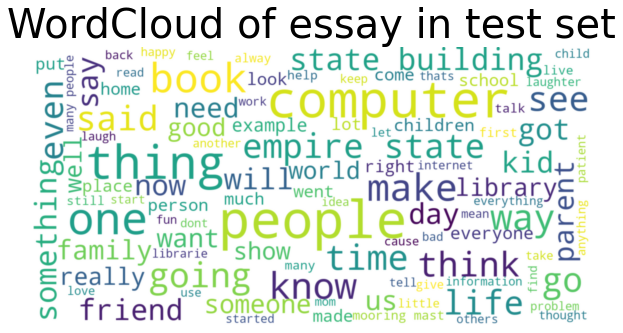

In [ ]:
word_cloud = WordCloud(
                       width=1600,
                       height=800, 
                       margin=0,
                       max_words=500, # Maximum numbers of words we want to see 
                       max_font_size=150, min_font_size=30,  # Font size range
                       background_color="white"
            ).generate(" ".join(df_test['essay']))

plt.figure(figsize=(10, 16))
plt.imshow(word_cloud, interpolation="gaussian")
plt.title('WordCloud of essay in test set', fontsize = 40)
plt.axis("off")
plt.show()

## Tokenizing

In [ ]:
print()
text = "I love you, don't you"

# instantiate tokenizer class
tokenizer1 = nltk.tokenize.WhitespaceTokenizer()
tokenizer2 = nltk.tokenize.TreebankWordTokenizer()
tokenizer3 = nltk.tokenize.WordPunctTokenizer()
tokenizer4 = nltk.tokenize.RegexpTokenizer(r'\w+')

print("Example Text: ", text)
print("Tokenization by whitespace: ", tokenizer1.tokenize(text))
print("Tokenization by words using Treebank Word Tokenizer: ", tokenizer2.tokenize(text))
print("Tokenization by punctuation: ", tokenizer3.tokenize(text))
print("Tokenization by regular expression: ", tokenizer4.tokenize(text))



Example Text:  I love you, don't you
Tokenization by whitespace:  ['I', 'love', 'you,', "don't", 'you']
Tokenization by words using Treebank Word Tokenizer:  ['I', 'love', 'you', ',', 'do', "n't", 'you']
Tokenization by punctuation:  ['I', 'love', 'you', ',', 'don', "'", 't', 'you']
Tokenization by regular expression:  ['I', 'love', 'you', 'don', 't', 'you']


In [ ]:
# Tokenizing the training and test set

# instantiate the tokenizer class
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')

# Tokenizing the training set
df_train['essay'] = df_train['essay'].apply(lambda x: tokenizer.tokenize(x))

# Tokenizing the test set
df_test['essay'] = df_test['essay'].apply(lambda x: tokenizer.tokenize(x))

In [ ]:
# Printing the tokenized string of the training set
print()
print('Tokenized String:')
df_train['essay'].head()


Tokenized String:


0    [dear, local, newspaper, i, think, effects, co...
1    [dear, i, believe, that, using, computers, wil...
2    [dear, more, and, more, people, use, computers...
3    [dear, local, newspaper, i, have, found, that,...
4    [dear, i, know, having, computers, has, a, pos...
Name: essay, dtype: object

In [ ]:
# Printing the tokenized string of the testing set

print()
print('Tokenized String:')
df_test['essay'].head()


Tokenized String:


0    [i, believe, that, computers, have, a, positiv...
1    [dear, i, know, some, problems, have, came, up...
2    [dear, to, whom, it, concern, computers, arent...
3    [dear, has, come, to, my, attention, that, som...
4    [dear, local, newspaper, i, think, that, peopl...
Name: essay, dtype: object

## Stopwords

The next step is to remove stop words. Stop words are words that don't add significant meaning to the text.

Note, these cells take some time to run, so we recommend running these cells separately.

In [ ]:
# Defining function to remove the stopwords

def remove_stopwords(text):
    
    words = [word for word in text if word not in stopwords.words('english')]
    return words

In [ ]:
# Removing the stopwords from the training set

df_train['essay'] = df_train['essay'].apply(lambda x: remove_stopwords(x))

In [ ]:
# Removing the stopwords from the test set

df_test['essay'] = df_test['essay'].apply(lambda x: remove_stopwords(x))

In [ ]:
# lets now look at the training set

df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,"[dear, local, newspaper, think, effects, compu...",4,4,8
1,2,1,"[dear, believe, using, computers, benefit, us,...",5,4,9
2,3,1,"[dear, people, use, computers, everyone, agree...",4,3,7
3,4,1,"[dear, local, newspaper, found, many, experts,...",5,5,10
4,5,1,"[dear, know, computers, positive, effect, peop...",4,4,8


In [ ]:
# lets now look at the test set

df_test.head()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,2383,1,"[believe, computers, positive, effect, people,...",2383,NaN
1,2384,1,"[dear, know, problems, came, individuals, agre...",2384,NaN
2,2385,1,"[dear, concern, computers, arent, reason, peop...",2385,NaN
3,2386,1,"[dear, come, attention, people, believe, techn...",2386,NaN
4,2387,1,"[dear, local, newspaper, think, people, lately...",2387,NaN


## Normalizing the Tokens and Stemming

In [ ]:
# Stemming and Lemmatization examples
import nltk
nltk.download('wordnet')

text = "How is the Josh"

tokenizer = nltk.tokenize.TreebankWordTokenizer()
tokens = tokenizer.tokenize(text)

# Stemmer 
stemmer = nltk.stem.PorterStemmer()
print("Stemming the sentence: ", " ".join(stemmer.stem(token) for token in tokens))

# Lemmatizer 
lemmatizer = nltk.stem.WordNetLemmatizer()
print("Lemmatizing the sentence: ", " ".join(lemmatizer.lemmatize(token) for token in tokens))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
Stemming the sentence:  how is the josh
Lemmatizing the sentence:  How is the Josh


In [ ]:
# After preprocessing the text format

def combine_text(list_of_text):
    
    combined_text = ' '.join(list_of_text)
    return combined_text



In [ ]:
# Preprocessing the train set

df_train['essay'] = df_train['essay'].apply(lambda x: combine_text(x))

df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,dear local newspaper think effects computers p...,4,4,8
1,2,1,dear believe using computers benefit us many w...,5,4,9
2,3,1,dear people use computers everyone agrees bene...,4,3,7
3,4,1,dear local newspaper found many experts say co...,5,5,10
4,5,1,dear know computers positive effect people com...,4,4,8


In [ ]:
# Preprocessing the test set

df_test['essay'] = df_test['essay'].apply(lambda x: combine_text(x))
df_test.head()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,2383,1,believe computers positive effect people help ...,2383,NaN
1,2384,1,dear know problems came individuals agree bene...,2384,NaN
2,2385,1,dear concern computers arent reason people don...,2385,NaN
3,2386,1,dear come attention people believe technology ...,2386,NaN
4,2387,1,dear local newspaper think people lately spent...,2387,NaN


In [ ]:
# text preprocessing functions 
def text_preprocessing(text):
    
    tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
    
    nopunc = clean_text(text)
    tokenized_text = tokenizer.tokenize(nopunc)
    remove_stopwords = [word for word in tokenized_text if word not in stopwords.words('english')]
    combined_text = ' '.join(remove_stopwords)
    return combined_text

## Transforming tokens to Vector

In [ ]:
# CountVectorizer can do all the above task of preprocessing, tokenization, and stop words removal

count_vectorizer = CountVectorizer()
train_vectors = count_vectorizer.fit_transform(df_train['essay'])
test_vectors = count_vectorizer.transform(df_test['essay'])

# Keeping only non-zero elements to preserve spaces
print(train_vectors[0].todense())

[[0 0 0 ... 0 0 0]]


In [ ]:
# TfidfVectorizer

tfidf = TfidfVectorizer(min_df=2, max_df=0.5, ngram_range=(1, 2))
train_tfidf = tfidf.fit_transform(df_train['essay'])
test_tfidf = tfidf.transform(df_test['essay'])

## Building the Final Model

This ADS uses a bunch of machine learning models to predict scores. We recognized that we were only suppose to explore one ADS, yet here there are 2 to 3. Therefore, we decided to explore both the K nearest neighbors and the logistic regression and compare their performances.  

In [ ]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(n_neighbors=1),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "MultinimialNB": MultinomialNB()
}

K Nearest Neighbors Model

In [ ]:
# Using the KNeighbors Classifiers

from sklearn.model_selection import cross_val_score

classifier = KNeighborsClassifier()

k_classifier = classifier.fit(train_vectors, df_train["domain1_score"]) # train_vectors = trainging data and df_train[domain_score] = target values
k_training_score = cross_val_score(classifier, train_vectors, df_train["domain1_score"], cv=5)
print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(k_training_score.mean(), 2) * 100, "% accuracy score")

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Classifiers:  KNeighborsClassifier Has a training score of 20.0 % accuracy score


Logistic Regression Model

In [ ]:
# Using the Logistic Regression

from sklearn.model_selection import cross_val_score

classifier2 = LogisticRegression()

log_classifier = classifier2.fit(train_vectors, df_train["domain1_score"])
log_training_score = cross_val_score(classifier2, train_vectors, df_train["domain1_score"], cv=5)
print("Classifiers: ", classifier2.__class__.__name__, "Has a training score of", round(log_training_score.mean(), 2) * 100, "% accuracy score")

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the docu

Classifiers:  LogisticRegression Has a training score of 40.0 % accuracy score


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



##Outcomes

Everything below is our own analysis of the performance and fairness of each model. 


###Process some of the data

We processed some the data in order to create a binary classification for age. The ADS data does not include any sensitive attributes. Therefore, we decided to use the grades for essay sets as a proxy for age. 

Privileged group = 7th and 8th graders or middle schoolers

Unprivileged group = 9th and 10th grader or high schoolers

####Training data


In [ ]:
df_train.head()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score
0,1,1,dear local newspaper think effects computers p...,4,4,8
1,2,1,dear believe using computers benefit us many w...,5,4,9
2,3,1,dear people use computers everyone agrees bene...,4,3,7
3,4,1,dear local newspaper found many experts say co...,5,5,10
4,5,1,dear know computers positive effect people com...,4,4,8


Here is where we create an extra column that represents the grade level of each student in the training dataset.

In [ ]:
extra_column = np.zeros((len(df_train)))
np_train_array = df_train.to_numpy()
# print(df_train_array)

for i in range(len(extra_column)):
  if(np_train_array[i][1] == 1 or np_train_array[i][1] == 5 or np_train_array[i][1] == 7 ): # essay sets for  middle school
  # essay set = 1,5,7
    extra_column[i] = 0 
  
  elif(np_train_array[i][1] == 2 or np_train_array[i][1] == 3 or np_train_array[i][1] == 4 or np_train_array[i][1] == 6 or np_train_array[i][1] == 8): # essay sets for high school
  # essay set = 2,3,4,6,8
    extra_column[i] = 1 

print(np_train_array.shape)
print(extra_column.shape)
extra_column = np.array(extra_column[:, None])
print(extra_column.shape)

(12976, 6)
(12976,)
(12976, 1)


In [ ]:
# combine the extra column to  our df_train'
np_array = np.concatenate((np_train_array, extra_column), axis = 1)

In [ ]:
# quick detour to calculate probabilities 
privileged_count = 0
unprivileged_count = 0
total = 0

for i in range(len(np_array)):
  if(np_array[i][6] == 1):
    privileged_count +=1
  elif(np_array[i][6] == 0):
    unprivileged_count +=1

print("Privileged count: ", privileged_count)
print("Unprivileged count: ", unprivileged_count)

priv_prob = privileged_count / len(np_array)
unpriv_prob = unprivileged_count / len(np_array)

print("Probability of being privileged: ", priv_prob)
print("Probability of being unprivileged: ", unpriv_prob )


Privileged count:  7819
Unprivileged count:  5157
Probability of being privileged:  0.6025739827373613
Probability of being unprivileged:  0.3974260172626387


In [ ]:
 # convert back to dataframe and reset column names 
 df_train_level = pd.DataFrame(np_array, columns=['essay_id', 'essay_set', 'essay', 'rater1_domain1', 'rater2_domain1', 'domain1_score', 'level' ])

In [ ]:
df_train_level.tail()

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,domain1_score,level
12971,21626,8,stories mothers daughters either enemies frien...,17,18,35,1
12972,21628,8,never understood meaning laughter shortest dis...,15,17,32,1
12973,21629,8,laugh habit cause causes laughing even thing c...,20,26,40,1
12974,21630,8,trippin fences years young short years ever re...,20,20,40,1
12975,21633,8,many people believe laughter improve life laug...,20,20,40,1


In [ ]:
# define priviledged and unprivileged groups
privileged_groups = [{'level': 1}]
unprivileged_groups = [{'level': 0}]

We mentioned this in our final report, but we were not given proper y_test data and therefore were unable to perform many fairness metrics. 

In [ ]:
# look to see how they divided x_train, y_train, x_test, y_test
x_train = train_vectors
y_train = df_train['domain1_score']
x_test = test_vectors
y_test = df_test['domain1_predictionid'] # this is not a valid y_test

####Test data


In [ ]:
'''
# create a new y_test 
np_test = df_test.to_numpy()
np_train = df_train.to_numpy()

index = df_test['domain1_predictionid']
index = index.to_numpy()
print(index.shape)

print(df_train.shape)


column = []
for i in index:
  value = np_train[i][5]
  print(value)
'''

# y_test = column

"\n# create a new y_test \nnp_test = df_test.to_numpy()\nnp_train = df_train.to_numpy()\n\nindex = df_test['domain1_predictionid']\nindex = index.to_numpy()\nprint(index.shape)\n\nprint(df_train.shape)\n\n\ncolumn = []\nfor i in index:\n  value = np_train[i][5]\n  print(value)\n"

###Evaluate fairness measures for each model

In [ ]:
# Function that calculate disparate impact 
def disparate(y_pred, np_array):
  priv_pos= 0
  unpriv_pos = 0

  for i in range(len(df_test)):
    if(y_pred == 1):
      if(np_array[i][6] == 1):
        priv_pos +=1
      elif(np_array[i][6] == 0):
        unpriv_pos +=1

  dis_impact = priv_pos / unpriv_pos

  return dis_impact


####K Nearest Neighbors

In [ ]:
model = model = k_classifier
x_test = test_vectors
k_y_pred = model.predict(x_test)

print(k_y_pred)
print(y_test)

[ 6  4  4 ...  4 31  1]
0        2383
1        2384
2        2385
3        2386
4        2387
        ...  
4249    25238
4250    25239
4251    25240
4252    25241
4253    25242
Name: domain1_predictionid, Length: 4254, dtype: int64


In [ ]:
print("Min: ", k_y_pred.min())
print("Max: ", k_y_pred.max())
print("Mean: ", np.mean(k_y_pred))
print("Median: ", np.median(k_y_pred))

Min:  0
Max:  40
Mean:  3.227080394922426
Median:  2.0


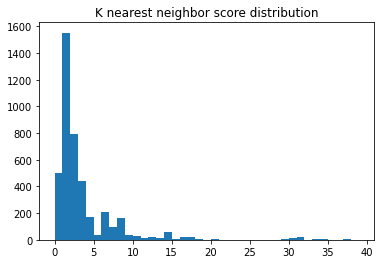

In [ ]:
from matplotlib import pyplot as plt 
   
bins = np.zeros((40))

for i in range(40):
  bins[i] = i

plt.hist(k_y_pred, bins) 
plt.title("K nearest neighbor score distribution") 
plt.show()

#####Fairness measures

Basic fairness measures

In [ ]:
# Evaluate for K Nearest Neighbors model
print("K Nearest Neighbors Model")
print("Accuracy: ", round(k_training_score.mean(), 2))

K Nearest Neighbors Model
Accuracy:  0.2


######Process Data

Next, we are going to explore how our privileged and unprivileged groups perform in terms of scores. First, we need to do some processing of the data.

In [ ]:
# Convert y_pred into two score class (low and high)
# Create a df frame that contains 0 and 1s
np_test = df_test.to_numpy()
# high scores = 1
# low scores = 0

#k_score_level = []
k_score_level = np.zeros((len(k_y_pred)))
k_extra_column = [] #np.zeros((len(k_y_pred)))

for i in range(len(k_y_pred)):
  if(k_y_pred[i] > np.median(k_y_pred)):
    #k_score_level.append("high")
    k_score_level[i] = 1
  elif(k_y_pred[i] <= np.median(k_y_pred)):
    #k_score_level.append("low") 
    k_score_level[i] = 0


  if(np_test[i][1] == 1 or np_test[i][1] == 5 or np_test[i][1] == 7 ): # essay sets for  middle school
  # essay set = 1,5,7
    #k_extra_column[i] = 0 
    k_extra_column.append("middle school") 
  elif(np_test[i][1] == 2 or np_test[i][1] == 3 or np_test[i][1] == 4 or np_test[i][1] == 6 or np_test[i][1] == 8): # essay sets for high school
  # essay set = 2,3,4,6,8
   #k_extra_column[1] = 1 
   k_extra_column.append("high school") 
  

k_score_level = np.array(k_score_level)
k_score_level = np.array(k_score_level[:, None])
k_extra_column = np.array(k_extra_column)
k_extra_column = np.array(k_extra_column[:, None])

In [ ]:
# Now we have an array that has columns with predicted score levels and their grade level
np_test_array = np.concatenate((np_test, k_score_level), axis = 1)

In [ ]:
np_test_array = np.concatenate((np_test_array, k_extra_column), axis = 1)

In [ ]:
# convert to df
df_k_test_level = pd.DataFrame(np_test_array, columns=['essay_id', 'essay_set', 'essay', 'domain1_predictionid', 'domain2_predictionid', 'score_level', 'grade_level'])

In [ ]:
df_k_test_level.head()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid,score_level,grade_level
0,2383,1,believe computers positive effect people help ...,2383,NaN,1,middle school
1,2384,1,dear know problems came individuals agree bene...,2384,NaN,1,middle school
2,2385,1,dear concern computers arent reason people don...,2385,NaN,1,middle school
3,2386,1,dear come attention people believe technology ...,2386,NaN,1,middle school
4,2387,1,dear local newspaper think people lately spent...,2387,NaN,1,middle school


In [ ]:
pd.crosstab(df_k_test_level["score_level"], df_k_test_level["grade_level"])

grade_level,high school,middle school
score_level,,
0.0,2005,836
1.0,601,812


In [ ]:
# relationship between score and grade
pd.crosstab(df_k_test_level["score_level"], df_k_test_level["grade_level"]).apply(lambda r: r/r.sum(), axis = 1)

grade_level,high school,middle school
score_level,,
0.0,0.705737,0.294263
1.0,0.425336,0.574664


######Histograms

After, the processesing, we have two new columns added to the test dataset. 'score_level' represents a binary attribute of 0 and 1, where 0 is a low score and 1 is a high score. Similarly, 'grade_level' is our sensitive attribute that is a proxy for age. It is also a binary attribute of 0 and 1, where 0 represents middle schoolers (unprivileged group) and 1 represents high schoolers (privileged group). Now, we will create histogram to show differences between the groups.  

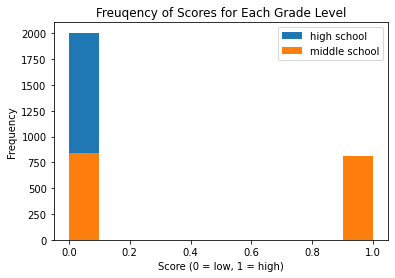

In [ ]:
# Histograms
# freuqency of each scoes for each group
df_k_test_level.groupby(['grade_level']).score_level.plot(kind = 'hist', alpha = 1)
plt.legend(loc = "upper right")
plt.title("Freuqency of Scores for Each Grade Level")
plt.xlabel("Score (0 = low, 1 = high)")
plt.show()

######Probability comparisons

In [ ]:
def performance(score):
  priv_pos= 0
  unpriv_pos = 0

  for i in range(len(np_test_array)):
    if(np_test_array[i][5] == score):
      if(np_test_array[i][6] == "high school"):
        priv_pos +=1
      elif(np_test_array[i][6] == "middle school"):
        unpriv_pos +=1

  prob_unpriv = unpriv_pos / len(df_test)
  prob_priv = priv_pos / len(df_test)
  disparate = unpriv_pos / priv_pos
  return prob_unpriv, prob_priv, disparate

In [ ]:
# compare how unprivileged and privileged group perform in terms of high scores (1)
prob_unpriv, prob_priv, disparate = performance(1)

print("Probability of unprivileged getting a high score: ", prob_unpriv)
print("Probability of privileged getting a high score: ", prob_priv)
print("Disparate Impact: ", disparate)

Probability of unprivileged getting a high score:  0.1908791725434885
Probability of privileged getting a high score:  0.14127879642689234
Disparate Impact:  1.3510815307820299


In [ ]:
# compare how unprivileged and privileged group perform in terms of low scores (0)
prob_unpriv, prob_priv, disparate = performance(0)

print("Probability of unprivileged getting a low score: ", prob_unpriv)
print("Probability of privileged getting a low score: ", prob_priv)

Probability of unprivileged getting a low score:  0.19652092148566055
Probability of privileged getting a low score:  0.4713211095439586


####Logistic Regression

In [ ]:
model = log_classifier
x_test = test_vectors
log_y_pred = model.predict(x_test)

print(log_y_pred)
print(log_y_pred.shape)

[ 8 11  8 ... 40 40 24]
(4254,)


In [ ]:
print("Min: ", log_y_pred.min())
print("Max: ", log_y_pred.max())
print("Mean: ", np.mean(log_y_pred))
print("Median: ", np.median(log_y_pred))

Min:  0
Max:  45
Mean:  6.382933709449929
Median:  3.0


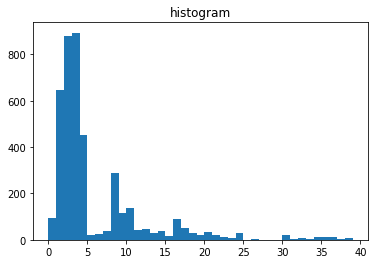

In [ ]:
from matplotlib import pyplot as plt 
   
bins = np.zeros((40))

for i in range(40):
  bins[i] = i

plt.hist(log_y_pred, bins) 
plt.title("histogram") 
plt.show()

#####Fairness measures

Basic fairness measures

In [ ]:
# Evaluate logistic regression model
print("Logistic Regression Model")
print("Accuracy: ", round(log_training_score.mean(), 2))

Logistic Regression Model
Accuracy:  0.4


######Process data


In [ ]:
# Convert y_pred into two score class (low and high)
# Create a df frame that contains 0 and 1s
np_test = df_test.to_numpy()
# high scores = 1
# low scores = 0

#k_score_level = []
l_score_level = np.zeros((len(log_y_pred)))
l_extra_column = [] #np.zeros((len(k_y_pred)))

for i in range(len(log_y_pred)):
  if(log_y_pred[i] > np.median(log_y_pred)):
    #l_score_level.append("high")
    l_score_level[i] = 1
  elif(log_y_pred[i] <= np.median(log_y_pred)):
    #l_score_level.append("low") 
    l_score_level[i] = 0


  if(np_test[i][1] == 1 or np_test[i][1] == 5 or np_test[i][1] == 7 ): # essay sets for  middle school
  # essay set = 1,5,7
    #k_extra_column[i] = 0 
    l_extra_column.append("middle school") 
  elif(np_test[i][1] == 2 or np_test[i][1] == 3 or np_test[i][1] == 4 or np_test[i][1] == 6 or np_test[i][1] == 8): # essay sets for high school
  # essay set = 2,3,4,6,8
   #k_extra_column[1] = 1 
   l_extra_column.append("high school") 
  

l_score_level = np.array(l_score_level)
l_score_level = np.array(l_score_level[:, None])
l_extra_column = np.array(l_extra_column)
l_extra_column = np.array(l_extra_column[:, None])

In [ ]:
# Now we have an array that has columns with predicted score levels and their grade level
np_test_array = np.concatenate((np_test, l_score_level), axis = 1)

In [ ]:
np_test_array = np.concatenate((np_test_array, k_extra_column), axis = 1)

In [ ]:
# convert to df
df_test_level = pd.DataFrame(np_test_array, columns=['essay_id', 'essay_set', 'essay', 'domain1_predictionid', 'domain2_predictionid', 'score_level', 'grade_level'])

In [ ]:
df_test_level.head()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid,score_level,grade_level
0,2383,1,believe computers positive effect people help ...,2383,NaN,1,middle school
1,2384,1,dear know problems came individuals agree bene...,2384,NaN,1,middle school
2,2385,1,dear concern computers arent reason people don...,2385,NaN,1,middle school
3,2386,1,dear come attention people believe technology ...,2386,NaN,1,middle school
4,2387,1,dear local newspaper think people lately spent...,2387,NaN,1,middle school


In [ ]:
pd.crosstab(df_test_level["score_level"], df_test_level["grade_level"])

grade_level,high school,middle school
score_level,,
0.0,1969,544
1.0,637,1104


In [ ]:
# relationship between score and grade
pd.crosstab(df_test_level["score_level"], df_test_level["grade_level"]).apply(lambda r: r/r.sum(), axis = 1)

grade_level,high school,middle school
score_level,,
0.0,0.783526,0.216474
1.0,0.365882,0.634118


######Histogram

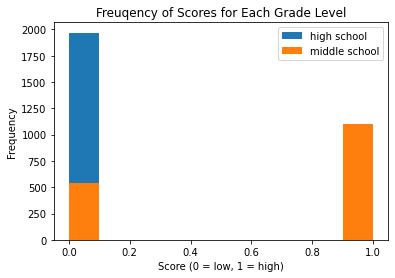

In [ ]:
# Histograms
# freuqency of each scoes for each group
df_test_level.groupby(['grade_level']).score_level.plot(kind = 'hist', alpha = 1)
plt.legend(loc = "upper right")
plt.title("Freuqency of Scores for Each Grade Level")
plt.xlabel("Score (0 = low, 1 = high)")
plt.show()

######Probability comparisons

In [ ]:
# compare how unprivileged and privileged group perform in terms of high scores (1)
prob_unpriv, prob_priv, disparate = performance(1)

print("Probability of unprivileged getting a high score: ", prob_unpriv)
print("Probability of privileged getting a high score: ", prob_priv)
print("Disparate Impact: ", disparate)

Probability of unprivileged getting a high score:  0.25952045133991536
Probability of privileged getting a high score:  0.14974141984015044
Disparate Impact:  1.7331240188383046


In [ ]:
# compare how unprivileged and privileged group perform in terms of low scores (0)
prob_unpriv, prob_priv, disparate = performance(0)

print("Probability of unprivileged getting a low score: ", prob_unpriv)
print("Probability of privileged getting a low score: ", prob_priv)

Probability of unprivileged getting a low score:  0.12787964268923366
Probability of privileged getting a low score:  0.4628584861307005


###Compare training_score for each model

Next, we compared the cross validation accuracy measurements of each model.

https://scikit-learn.org/stable/modules/cross_validation.html 

In [ ]:
# compare training_score of each model
# Evaluate a score by cross-validation
# output is an array of scores of the estimator for each run of the cross validation. (here it runs 5 times)
# goal is to be close to 1 (essentially cross validated accuracy scores)

print(k_training_score)
print(log_training_score)

[0.28312789 0.15529865 0.11021195 0.16262042 0.29595376]
[0.39137134 0.42042389 0.41310212 0.41541426 0.33872832]


No handles with labels found to put in legend.


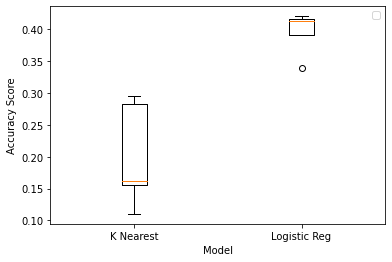

In [ ]:
# Create box plots showing comparing these scores
x_init = list(range(len(k_training_score)))
x_tuned = [x + 0.35 for x in x_init]

plt.boxplot([k_training_score, log_training_score], labels=['K Nearest', 'Logistic Reg'])

# Create labels, etc. 
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

##SHAP

###Load

In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 8.3MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491626 sha256=3adae5d3ca5f5f3429d3a087bedfdeb9af09ff20c161eb403955b5d3bd2bbaba
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
from __future__ import print_function

import shap
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import sklearn.ensemble
import sklearn.metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import tqdm
from sklearn.linear_model import SGDClassifier
from sklearn.datasets import fetch_20newsgroups
from collections import defaultdict
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
import seaborn as sns

# Configs
np.random.seed(1)
shap.initjs()
sns.set_style("whitegrid")

plot_shap=True # NOTE: Turn False to disable shap plots as they can be slow to load 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


### Explainer

We use the SHAP explainer on the  K nearest neighbors model.

https://slundberg.github.io/shap/notebooks/Iris%20classification%20with%20scikit-learn.html


In [ ]:
# explore SHAP with K nearest neighbors
model = k_classifier
x_train = train_vectors
y_train = df_train['domain1_score']
x_test = test_vectors
y_test = df_train['domain1_score']#df_test['domain1_predictionid']

#y_pred = df_k_test_level["score_level"]

In [ ]:
X_train_summary = shap.kmeans(x_train, 5)

In [ ]:
# Initialize the explainer
explainer = shap.KernelExplainer(model.predict, X_train_summary)
#explainer = shap.KernelExplainer(model.predict, train_tfidf)

Hashing

In [ ]:
import random

size = len(df_test)
list1 = random.sample(range(0, size), 75)

print(list1)

[1029, 2526, 3548, 837, 4229, 2824, 2489, 563, 1160, 2391, 2471, 2878, 1007, 506, 3019, 3692, 3997, 3455, 4128, 556, 2401, 3565, 736, 3902, 4014, 1522, 2794, 379, 858, 2012, 2231, 4121, 2764, 424, 2256, 827, 2091, 785, 4125, 592, 534, 1291, 416, 167, 776, 4127, 2726, 3382, 606, 2124, 2280, 4126, 1913, 213, 345, 596, 1954, 2228, 867, 3975, 1040, 582, 1873, 1340, 2038, 2399, 1595, 2930, 495, 2224, 2115, 384, 2717, 2370, 362]


In [ ]:
x_test_sample = x_test[list1, :]
print(x_test[list1, :])
print(x_test[list1, :].shape)

  (0, 911)	1
  (0, 1275)	1
  (0, 1640)	1
  (0, 2230)	1
  (0, 2889)	2
  (0, 2949)	1
  (0, 3071)	3
  (0, 4205)	9
  (0, 4241)	4
  (0, 5480)	1
  (0, 6010)	1
  (0, 6130)	1
  (0, 6150)	1
  (0, 8214)	2
  (0, 8282)	1
  (0, 10176)	1
  (0, 11116)	6
  (0, 12884)	1
  (0, 12926)	2
  (0, 13825)	1
  (0, 14117)	1
  (0, 14176)	1
  (0, 14403)	2
  (0, 15992)	1
  (0, 16037)	1
  :	:
  (74, 27602)	1
  (74, 27693)	5
  (74, 27712)	3
  (74, 28398)	1
  (74, 29576)	1
  (74, 29664)	1
  (74, 30530)	1
  (74, 30787)	1
  (74, 32142)	2
  (74, 32558)	1
  (74, 33615)	1
  (74, 33913)	1
  (74, 34117)	1
  (74, 36434)	2
  (74, 37008)	1
  (74, 37784)	1
  (74, 39566)	1
  (74, 39571)	2
  (74, 39903)	3
  (74, 39911)	2
  (74, 40638)	1
  (74, 40925)	1
  (74, 41290)	1
  (74, 41401)	1
  (74, 41591)	1
(75, 41819)


In [ ]:
# Apply it to the test data
shap_values = explainer.shap_values(x_test_sample)

####Visualize the Explainer

In [ ]:
# We need to provide the data in dense format, not sparse
X_test_array = x_test.toarray()

In [ ]:
# Select 5 documents in the test set for explanation
item1 = 50
item2 = 38
item3 = 74

In [ ]:
np_test = df_test.to_numpy()

In [ ]:
# Visually explain documents
shap.initjs()
idx = item1
#print("Positive" if y_test[idx] else "Negative", "Score:")
print("Essay ID: ", np_test[idx][0])
print("Essay set: ", np_test[idx][1])
print(np_test[idx][2]) # print essay 
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=count_vectorizer.get_feature_names()
)

Essay ID:  2433
Essay set:  1
dear recently heard people cant agree computers benifet thet society others believe computers benifet teachs hand eye coordination learn far away places people chat people online first reason think computers benifit society talk people online many ways advantage many people example student abscent school could easly log onto social net work like face book space get work one friends local suvey school shows students whe abscent get work online friend student needed tutter thing student could chat tuter get help subject see computers benifet society second reason computers benifet society learn far away places people benifet student project could easly type search engine hundreds web sites would popup information instead searching books acedemics weekly says students use computers learn far away places people see computers benifet society thir dand final reason computers benifet society teachs hand eye coordination benifet society student learned eye coordin

In [ ]:
# Visually explain documents 
shap.initjs()
idx = item2
#print("Positive" if y_test[idx] else "Negative", "Score:")
print("Essay ID: ", np_test[idx][0])
print("Essay set: ", np_test[idx][1])
print(np_test[idx][2]) # print essay 
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=count_vectorizer.get_feature_names()
)

Essay ID:  2421
Essay set:  1
opinion effect computers people people arent safe lot teens kids computers go yahoo space talk friends sometimes teen talk people know hurt tell something makes uncomfortible like computers really know like sometimes careful surfing web another effect computers people people arnt healthy kids teens even abults dont go outside exercise get fresh air busy house playing computer alot kids adults gain alot weigh dont stop messing computer would want get fat takeing care body playing computer third reason computer effect people arent learning kids play mini games computes arent leaning anything homworke forget busy play games computer could go school teacher teaching somthing like math lesson kids could thinking game play computer like pass level games score points lesson wouldnt learning anything wasnt paying attection wouldnt want kids spent much time computer know anything fourth effect computers effect people people get trouble gettlog music internet paying

In [ ]:
shap.initjs()
idx = item3
#print("Positive" if y_test[idx] else "Negative", "Score:")
print("Essay ID: ", np_test[idx][0])
print("Essay set: ", np_test[idx][1])
print(np_test[idx][2]) # print essay 
shap.force_plot(
    explainer.expected_value, shap_values[idx,:], X_test_array[idx,:],
    feature_names=count_vectorizer.get_feature_names()
)

Essay ID:  2457
Essay set:  1
dear loyal readers big city walk bustiling street empty deserted person see stares straight ground walks afraid interact walk nearby shop person shop obese lady sitting corner effected presence smell junk food sugar fill nostrils enjoying clicking keyboard fills ears growing use computers people exercising much enjoying nature interacting people computers definiatly negative effect society first many people spending much time enough time getting exercise sitting day increase amount obese people world amount obese people already high growing astonishing rate due abundance usage study medical department shows number obese people increasing every year study also computers cause simply healthy sit day top fact sitting prone eating example playing game look jumpo bag chips playing eating time knew chips gone almost though know eating though computers great pieces technology health problems cause make worth would want unhealthy fate next sitting day able enjoy n

####Word Analysis

Item 1

In [ ]:
# Checking the words that contribute to the positive and negative classification of document 7
idx = item1
vals = shap_values[idx,:]
positive_sentiment_weight = defaultdict(float)
negative_sentiment_weight = defaultdict(float)
feats = count_vectorizer.get_feature_names()

for feat_i, val_i in zip(feats, vals):
  if val_i > 0:
    positive_sentiment_weight[feat_i] += val_i
  elif val_i < 0:
    negative_sentiment_weight[feat_i] += val_i

In [ ]:
import operator
list(sorted(positive_sentiment_weight.items(), key=operator.itemgetter(1), reverse=True))[:]


[('saeng', 0.4682593729792303),
 ('hibiscus', 0.37377463872004474),
 ('test', 0.11566264081029924),
 ('dad', 0.10100216531906132),
 ('low', 0.091793579344675),
 ('spend', 0.08900992348746511),
 ('familiar', 0.08177138697761883),
 ('symbolize', 0.0714279734232717),
 ('plants', 0.005013484538098902),
 ('little', 0.0010707061129757044)]

In [ ]:
list(sorted(negative_sentiment_weight.items(), key=operator.itemgetter(1)))[:]

[('story', -0.46513891751205105),
 ('author', -0.16004971960989336),
 ('concludes', -0.09455403314690784),
 ('end', -0.09431406542493757),
 ('mood', -0.08899369591002299),
 ('new', -0.08615616565154816),
 ('people', -0.0806661383452588),
 ('computer', -0.07108656153389835),
 ('libraries', -0.06796496186156059),
 ('good', -0.06583669752425603),
 ('computers', -0.06375894460978021),
 ('friends', -0.0625509482847179),
 ('said', -0.059149734290757955),
 ('outside', -0.05856836205509065),
 ('dear', -0.055661193656471666),
 ('way', -0.04998398632557945),
 ('paragraph', -0.046907211730746995),
 ('together', -0.046656634822258854),
 ('demonstrated', -0.04356335342828751),
 ('offensive', -0.04332303807757914),
 ('back', -0.042122308071982986),
 ('would', -0.03987840121080444),
 ('hard', -0.03600431009922391),
 ('laughing', -0.03469551891843502),
 ('geese', -0.03255727982702755),
 ('laughter', -0.03246356665520513),
 ('games', -0.03207368942756374),
 ('look', -0.030627250907843545),
 ('building'

Item 2

In [ ]:
# Checking the words that contribute to the positive and negative classification of document 7
idx = item2
vals = shap_values[idx,:]
positive_sentiment_weight = defaultdict(float)
negative_sentiment_weight = defaultdict(float)
feats = count_vectorizer.get_feature_names()

for feat_i, val_i in zip(feats, vals):
  if val_i > 0:
    positive_sentiment_weight[feat_i] += val_i
  elif val_i < 0:
    negative_sentiment_weight[feat_i] += val_i

In [ ]:
list(sorted(positive_sentiment_weight.items(), key=operator.itemgetter(1), reverse=True))[:]

[('laugh', 19.73872603467384),
 ('laughter', 1.7210702126879949),
 ('laughing', 1.5759981456489225),
 ('us', 0.719354617122633),
 ('offensive', 0.6246171069183122),
 ('handed', 0.5116905296536238),
 ('ever', 0.41822058543602036),
 ('love', 0.33957428129402056),
 ('brother', 0.3331590643015545),
 ('uncontrollably', 0.3320327388553399),
 ('going', 0.23980138699160225),
 ('friends', 0.2219823281689295),
 ('like', 0.21337247309033014),
 ('big', 0.17627558846866753),
 ('mom', 0.16963985352197408),
 ('fun', 0.13298820862644423),
 ('told', 0.12553025591232636),
 ('usually', 0.12071032152942252),
 ('wants', 0.10808302418805482)]

In [ ]:
list(sorted(negative_sentiment_weight.items(), key=operator.itemgetter(1)))[:]

[]

Item 3

In [ ]:
# Checking the words that contribute to the positive and negative classification of document 7
idx = item3
vals = shap_values[idx,:]
positive_sentiment_weight = defaultdict(float)
negative_sentiment_weight = defaultdict(float)
feats = count_vectorizer.get_feature_names()

for feat_i, val_i in zip(feats, vals):
  if val_i > 0:
    positive_sentiment_weight[feat_i] += val_i
  elif val_i < 0:
    negative_sentiment_weight[feat_i] += val_i

In [ ]:
list(sorted(positive_sentiment_weight.items(), key=operator.itemgetter(1), reverse=True))[:]

[('computers', 2.2155976007858347),
 ('play', 0.14354026786706733),
 ('good', 0.13631975516078784),
 ('story', 0.11295407922511354),
 ('people', 0.11144895726962885),
 ('mental', 0.097528569428132),
 ('author', 0.09242793662629478)]

In [ ]:
list(sorted(negative_sentiment_weight.items(), key=operator.itemgetter(1)))[:]

[('mood', -0.08925658575471138),
 ('internet', -0.06909619790867531),
 ('could', -0.05918725980568181),
 ('allow', -0.05662567891715748),
 ('time', -0.05618241022723753),
 ('many', -0.055707815100185035),
 ('talk', -0.050948722885466674),
 ('hard', -0.050828931594427466),
 ('laughing', -0.049825018675590006),
 ('anyone', -0.04522612434239909),
 ('laughter', -0.04490249902745676),
 ('said', -0.044860622528664296),
 ('able', -0.0407133689650602),
 ('came', -0.038390636165864966),
 ('building', -0.03838709110612431),
 ('home', -0.037117145701754055),
 ('every', -0.035486097272714935),
 ('think', -0.03400670753373432),
 ('brother', -0.027164096157684576),
 ('would', -0.02656324626798523),
 ('take', -0.024989652411562834),
 ('benefit', -0.022793680042850904),
 ('capacity', -0.020470159553128302),
 ('face', -0.019149155093222868),
 ('learn', -0.017443285782984052),
 ('everyone', -0.016532464052504713),
 ('make', -0.015135756398018273)]